In [61]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [62]:
# Load data
iris = datasets.load_iris()
# Gets sepal length, sepal width, petal length, petal width for 150 samples
# 150 rows, 4 columns
X=iris.data[:,:]
# Gets the flower type for 150 samples
y=iris.target[:]



In [63]:
def Stochastic_GD_Linear_Regression(Learning_Rate,num_iterations,X,y,stopping_threshold, print_iterations):
    
    under_threshold = False
    
    # The sample size
    N = len(y)
   
    # Stores the 4 weights. 1 for each input feature. Each start at 0
    # 4 rows, 1 column
    w = np.zeros((X.shape[1],1))
    
    # Setting all the weights to 0.1
    w[0] = 0.1
    w[1] = 0.1
    w[2] = 0.1
    w[3] = 0.1
    
    # Bias
    b = 0.01
    
    prev_cost = 0
    curr_cost = 0
    
    counter = 0
    
    # Stores the cost at every iteration
    #  Measures of how well a machine learning model is able to predict the correct output for a given input.
    # Low cost is good
    costs = []
    
    # While the change in cost is not under the stopping_threshold
    #while(under_threshold == False):
    while(counter < num_iterations):
        # 1 sample at a time
        for i in range(N):
            if(counter > num_iterations):
                break
            
            counter = counter + 1
            
            if(counter > 1):
                prev_cost = curr_cost
                
            
            # The correct flower type for this output
            desired_output = y[i]
            

            # Z=np.dot(w.T,X.T)+b
            # Multiply the weight of each feature by the feature value for the sample. Then add bias
            y_pred = ((w[0] * X[i][0]) + (w[1] * X[i][1]) + (w[2] * X[i][2]) +(w[3] * X[i][3])) + b
            


            # Mean Squared Error
            # curr_cost = np.sum((desired_output-y_pred)**2) / len(y)
            curr_cost = (desired_output-y_pred)**2
            
                
                
            costs.append(curr_cost)
            

            # Correct output - predicted output
            error_term = desired_output - y_pred



            # dw=1/N*np.dot(X.T,(y_pred-y).T)
            # Weights Derivative
            # I don't use this since worksheet gave formula for calculating weights
            dw = 1/N * ((X[i][0] * (y_pred-desired_output)) + (X[i][1] * (y_pred-desired_output)) + 
            (X[i][2] * (y_pred-desired_output)) + (X[i][3] * (y_pred-desired_output)))
            

            # db=1/N*np.sum(y_pred-y)
            # Bias Derivative
            db = 1/N * np.sum(y_pred-desired_output)

            
            # Update Weight
            # w = w - Learning_Rate * dw


            # Update Bias
            b = b + (Learning_Rate * error_term)
            # b = b - Learning_Rate * db


            #  Update the weights
            w[0] = w[0] + (Learning_Rate * error_term * X[i][0])
            w[1] = w[1] + (Learning_Rate * error_term * X[i][1])
            w[2] = w[2] + (Learning_Rate * error_term * X[i][2])
            w[3] = w[3] + (Learning_Rate * error_term * X[i][3])

            

            if(counter < 6 and print_iterations == True):
            #if(counter % 1000 == 0):
                print("Iteration:")
                print(counter)
                print("Cost:")
                print(curr_cost)
                print("Weights:")
                print(w)
                print("Bias:")
                print(b)
                
            

            
    return costs
            
    
        
        

In [64]:
Result_Stochastic_GD_Linear_Regression = Stochastic_GD_Linear_Regression(Learning_Rate=0.01,num_iterations=25,X=X,y=y
                                                                         ,stopping_threshold=1e-15, print_iterations=True)


Iteration:
1
Cost:
[1.0609]
Weights:
[[0.04747]
 [0.06395]
 [0.08558]
 [0.09794]]
Bias:
[-0.0003]
Iteration:
2
Cost:
[0.31759198]
Weights:
[[0.0198559 ]
 [0.04704341]
 [0.07769026]
 [0.09681289]]
Bias:
[-0.00593553]
Iteration:
3
Cost:
[0.12836889]
Weights:
[[0.00301646]
 [0.03557826]
 [0.07303254]
 [0.09609632]]
Bias:
[-0.00951839]
Iteration:
4
Cost:
[0.05925232]
Weights:
[[-0.00818077]
 [ 0.0280323 ]
 [ 0.06938127]
 [ 0.09560949]]
Bias:
[-0.01195257]
Iteration:
5
Cost:
[0.0269996]
Weights:
[[-0.01639655]
 [ 0.02211694]
 [ 0.06708085]
 [ 0.09528085]]
Bias:
[-0.01359573]


In [65]:
def Stochastic_GD_Logistic_Regression(Learning_Rate,num_iterations,X,y,stopping_threshold, print_iterations):
    
    under_threshold = False
    
    # The sample size
    N = len(y)
   
    # Stores the 4 weights. 1 for each input feature. Each start at 0
    # 4 rows, 1 column
    w = np.zeros((X.shape[1],1))
    
    # Setting all the weights to 0.1
    w[0] = 0.1
    w[1] = 0.1
    w[2] = 0.1
    w[3] = 0.1
    
    # Bias
    b = 0.01
    
    prev_cost = 0
    curr_cost = 0
    
    counter = 0
    
    # Stores the cost at every iteration
    #  Measures of how well a machine learning model is able to predict the correct output for a given input.
    # Low cost is good
    costs = []
    
    # While the change in cost is not under the stopping_threshold
    #while(under_threshold == False):
    while(counter < num_iterations):
        # 1 sample at a time
        for i in range(N):
            if(counter > num_iterations):
                break
                
            counter = counter + 1
            
            
            if(counter > 1):
                prev_cost = curr_cost
                
            
            # The correct flower type for this output
            desired_output = y[i]
            

            # Z=np.dot(w.T,X.T)+b
            # Multiply the weight of each feature by the feature value for the sample. Then add bias
            z = ((w[0] * X[i][0]) + (w[1] * X[i][1]) + (w[2] * X[i][2]) +(w[3] * X[i][3])) + b
            
            
            
            y_pred = 1/(1 + np.exp(-z))

            


            # Mean Squared Error
            curr_cost = (desired_output-y_pred)**2
            
            
            
            
            costs.append(curr_cost)
            
                


            # Correct output - predicted output
            error_term = desired_output - y_pred


            

            # Update Bias
            b = b + (Learning_Rate * error_term)


            #  Update the weights
            w[0] = w[0] + (Learning_Rate * error_term * X[i][0])
            w[1] = w[1] + (Learning_Rate * error_term * X[i][1])
            w[2] = w[2] + (Learning_Rate * error_term * X[i][2])
            w[3] = w[3] + (Learning_Rate * error_term * X[i][3])

            

            if(counter < 6 and print_iterations == True):
            #if(counter % 1000 == 0):
                print("Iteration:")
                print(counter)
                print("Cost:")
                print(curr_cost)
                print("Weights:")
                print(w)
                print("Bias:")
                print(b)
                


    return costs
            
            
            
    
        
        

In [66]:
Result_Stochastic_GD_Logistic_Regression = Stochastic_GD_Logistic_Regression(Learning_Rate=0.01,num_iterations=25,X=X,y=y
                                                                         ,stopping_threshold=1e-15, print_iterations=True)


Iteration:
1
Cost:
[0.54304504]
Weights:
[[0.06241729]
 [0.07420794]
 [0.08968318]
 [0.09852617]]
Bias:
[0.00263084]
Iteration:
2
Cost:
[0.43947094]
Weights:
[[0.02993391]
 [0.05432016]
 [0.08040221]
 [0.09720032]]
Bias:
[-0.00399842]
Iteration:
3
Cost:
[0.36837928]
Weights:
[[0.00140761]
 [0.034898  ]
 [0.07251196]
 [0.09598643]]
Bias:
[-0.01006785]
Iteration:
4
Cost:
[0.31122835]
Weights:
[[-0.0242548 ]
 [ 0.01760377]
 [ 0.06414378]
 [ 0.09487067]]
Bias:
[-0.01564663]
Iteration:
5
Cost:
[0.25888374]
Weights:
[[-0.0496951 ]
 [-0.00071325]
 [ 0.0570205 ]
 [ 0.09385306]]
Bias:
[-0.02073469]


In [67]:
LINR1 = Stochastic_GD_Linear_Regression(Learning_Rate=0.001,num_iterations=25,X=X,y=y
                                                                         ,stopping_threshold=1e-15, print_iterations=False)

In [68]:
LINR2 = Stochastic_GD_Linear_Regression(Learning_Rate=0.005,num_iterations=25,X=X,y=y
                                                                         ,stopping_threshold=1e-15, print_iterations=False)

In [69]:
LINR3 = Stochastic_GD_Linear_Regression(Learning_Rate=0.01,num_iterations=25,X=X,y=y
                                                                         ,stopping_threshold=1e-15, print_iterations=False)

In [70]:
LINR4 = Stochastic_GD_Linear_Regression(Learning_Rate=0.03,num_iterations=25,X=X,y=y
                                                                         ,stopping_threshold=1e-15, print_iterations=False)

In [71]:
LINR5 = Stochastic_GD_Linear_Regression(Learning_Rate=0.05,num_iterations=25,X=X,y=y
                                                                         ,stopping_threshold=1e-15, print_iterations=False)

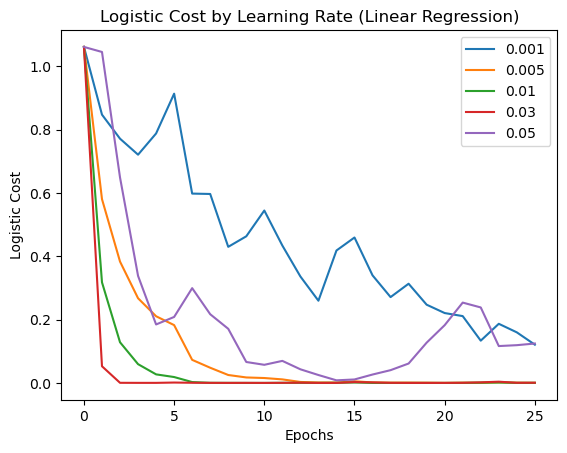

In [72]:
# 6.
plt.xlabel("Epochs")
plt.ylabel("Logistic Cost")
plt.title("Logistic Cost by Learning Rate (Linear Regression)")


plt.plot(LINR1, label="0.001")
plt.plot(LINR2, label="0.005")
plt.plot(LINR3, label="0.01")
plt.plot(LINR4, label="0.03")
plt.plot(LINR5, label="0.05")


plt.legend()
plt.show()

In [73]:
LOGR1 = Stochastic_GD_Logistic_Regression(Learning_Rate=0.001,num_iterations=25,X=X,y=y
                                                                         ,stopping_threshold=1e-15, print_iterations=False)

In [74]:
LOGR2 = Stochastic_GD_Logistic_Regression(Learning_Rate=0.005,num_iterations=25,X=X,y=y
                                                                         ,stopping_threshold=1e-15, print_iterations=False)

In [75]:
LOGR3 = Stochastic_GD_Logistic_Regression(Learning_Rate=0.01,num_iterations=25,X=X,y=y
                                                                         ,stopping_threshold=1e-15, print_iterations=False)

In [76]:
LOGR4 = Stochastic_GD_Logistic_Regression(Learning_Rate=0.03,num_iterations=25,X=X,y=y
                                                                         ,stopping_threshold=1e-15, print_iterations=False)

In [77]:
LOGR5 = Stochastic_GD_Logistic_Regression(Learning_Rate=0.05,num_iterations=25,X=X,y=y
                                                                         ,stopping_threshold=1e-15, print_iterations=False)

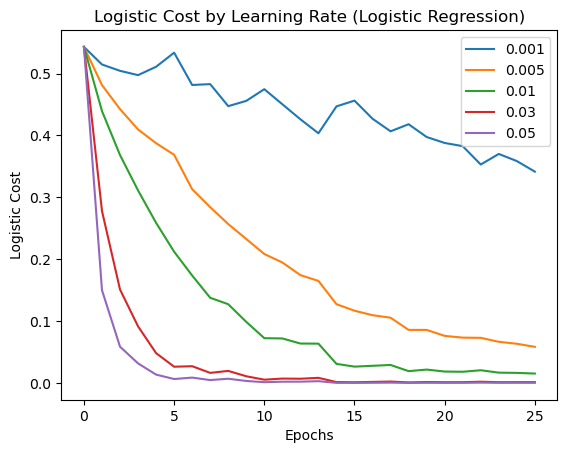

In [78]:
# 7.
plt.xlabel("Epochs")
plt.ylabel("Logistic Cost")
plt.title("Logistic Cost by Learning Rate (Logistic Regression)")


plt.plot(LOGR1, label="0.001")
plt.plot(LOGR2, label="0.005")
plt.plot(LOGR3, label="0.01")
plt.plot(LOGR4, label="0.03")
plt.plot(LOGR5, label="0.05")


plt.legend()
plt.show()

8.
    For this assignment, our job was to implement logisitc and linear regression with stochastic gradient descent. The goal of our implementation was to achieve a low cost function that would converge close to 0. The cost function is obtained by using the mean squared error function, which subtracts the difference between the target prediction and the actual target. The key difference between stochastic and batch gradient descent is the amount of samples being tested. In the examples given to us for batch, all of the samples were being tested at once. However, for stochastic, only one sample is being tested at once. As the algorithms are running, the weights are being adjusted after every iteration. These weights for the iris dataset are for the sepal length, sepeal width, petal length, and petal width. The higher the weight, the more value it has in predicting the flower type. One trend I noticed was that the cost function would spike when a new flower was introduced. The first fifty flowers were of the same species, and the cost function would get low by the time the last flower of the species was reached. Flower fifty-one would be of a new species and the cost function would spike. However, this makes sense because the algorithm has yet to have enough data on the newly introduced flower to make a good prediction for the target value. The same spike would also occur at flower one hundred and one. The above graphs demonstrate that a higher learning rate causes the cost function to converge to zero quicker. This is because it causes the updates to the model parameters to be larger. However, the downside is that a higher learning rate can cause the algorithm to overshoot the optimal solution. The graphs also show that the cost for linear regression starts out higher, but converges quicker when compared to logisitc regression.

The primary purpose of a cost function is to quantify the error or discrepancy between the predicted outputs of the model and the true values in the training data. 